In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
file = r'covid19_casos_brasil.csv'

df = pd.read_csv(file)
df = df.drop('city_ibge_code',axis=1)
Q1 = df[df['is_repeated'] == False]
Q1['date'] = pd.to_datetime(Q1['date'])
Q1.head()

C:\Users\João Bornelli\AppData\Local\Temp\ipykernel_13664\1004090240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1['date'] = pd.to_datetime(Q1['date'])


,city,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [7]:
sul_cities = ['Florianópolis','Porto Alegre', 'Curitiba']
sudeste_cities = ['São Paulo','Rio de Janeiro','Belo Horizonte','Vitória']

sul_data = Q1[Q1['city'].isin(sul_cities)][['date','last_available_confirmed','last_available_deaths','city']]
sudeste_data = Q1[Q1['city'].isin(sudeste_cities)][['date','last_available_confirmed','last_available_deaths','city']]
joinville_data = Q1[Q1['city'].isin(['Joinville'])][['date','last_available_confirmed','last_available_deaths','city']]

In [3]:
def _plot_line(dataFrame, axs, xAxisName, yAxisName, hue = None, style = None, xlabel = 'x', ylabel ='y', grapthTitle = '', legendTitle = ''):
  lines = sns.lineplot(data = dataFrame,
    x = xAxisName,
    y = yAxisName,
    hue = hue,
    style = style,
    ax = ax[axs],
    errorbar=None,
    sort=False)

  ax[axs].set(xlabel = xlabel, ylabel = ylabel, title = grapthTitle)
  ax[axs].tick_params(axis='x', rotation=20)
  ax[axs].set_xticks(dataFrame[xAxisName][::int(len(dataFrame[xAxisName])/10)])
  ax[axs].get_legend().set_visible(False)


  return lines

def _plot_bar(dataFrame, axs, xAxisName, yAxisName, hue = None, lim = 100, orient = 'x', xlabel = 'x', ylabel ='y', grapthTitle = '', legendTitle = ''):
  bars = sns.barplot(data = dataFrame,
    x = xAxisName,
    y = yAxisName,
    hue = hue,
    ax = ax[axs],
    errorbar = None,
    orient = orient,
    saturation = 1,
    estimator = 'max')

  ax[axs].set(xlabel = xlabel, ylabel = ylabel, title = grapthTitle)

  return bars

Joinville data

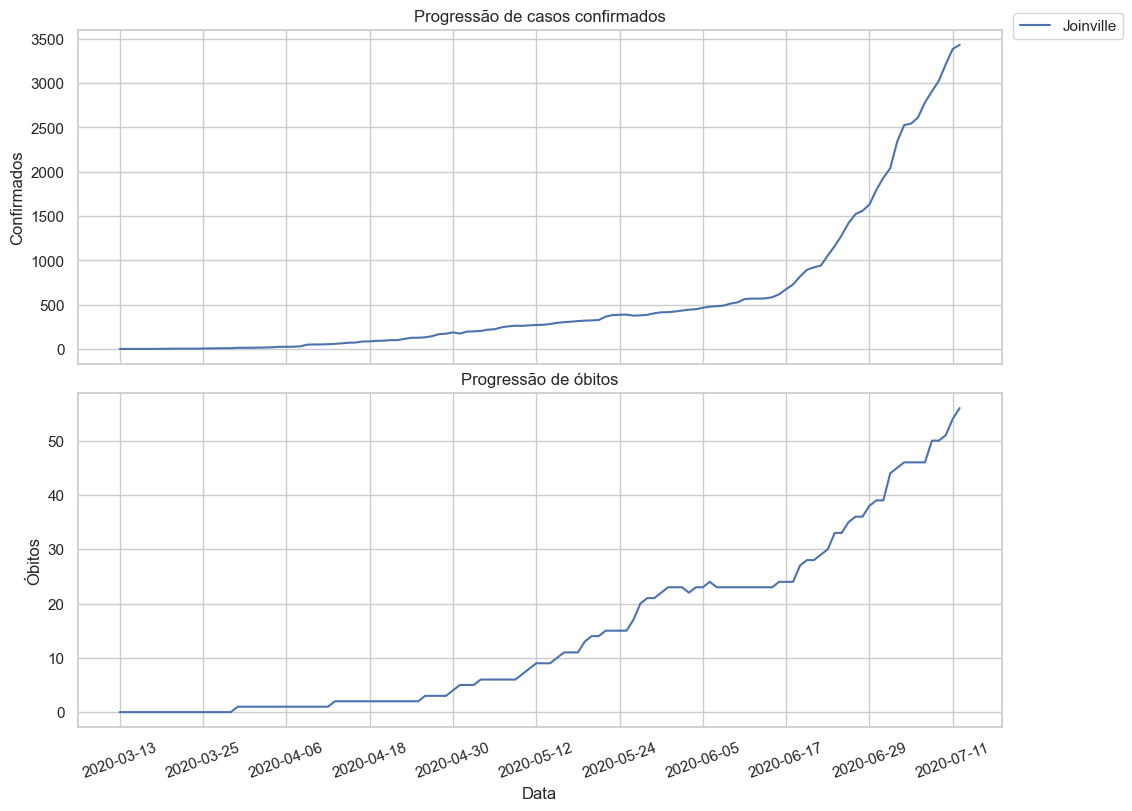

In [43]:
fig,ax = plt.subplots(2, 1, figsize = (10,8), layout = 'constrained', sharex = True)

lines = _plot_line(dataFrame = joinville_data,
  axs = 0,
  xAxisName = 'date',
  yAxisName = 'last_available_confirmed',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Confirmados',
  grapthTitle = 'Progressão de casos confirmados',
  legendTitle = 'Cidade')

lines = _plot_line(dataFrame = joinville_data,
  axs = 1,
  xAxisName ='date',
  yAxisName ='last_available_deaths',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Óbitos',
  grapthTitle = 'Progressão de óbitos',
  legendTitle = 'Cidade')

handles, labels = lines.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

South data

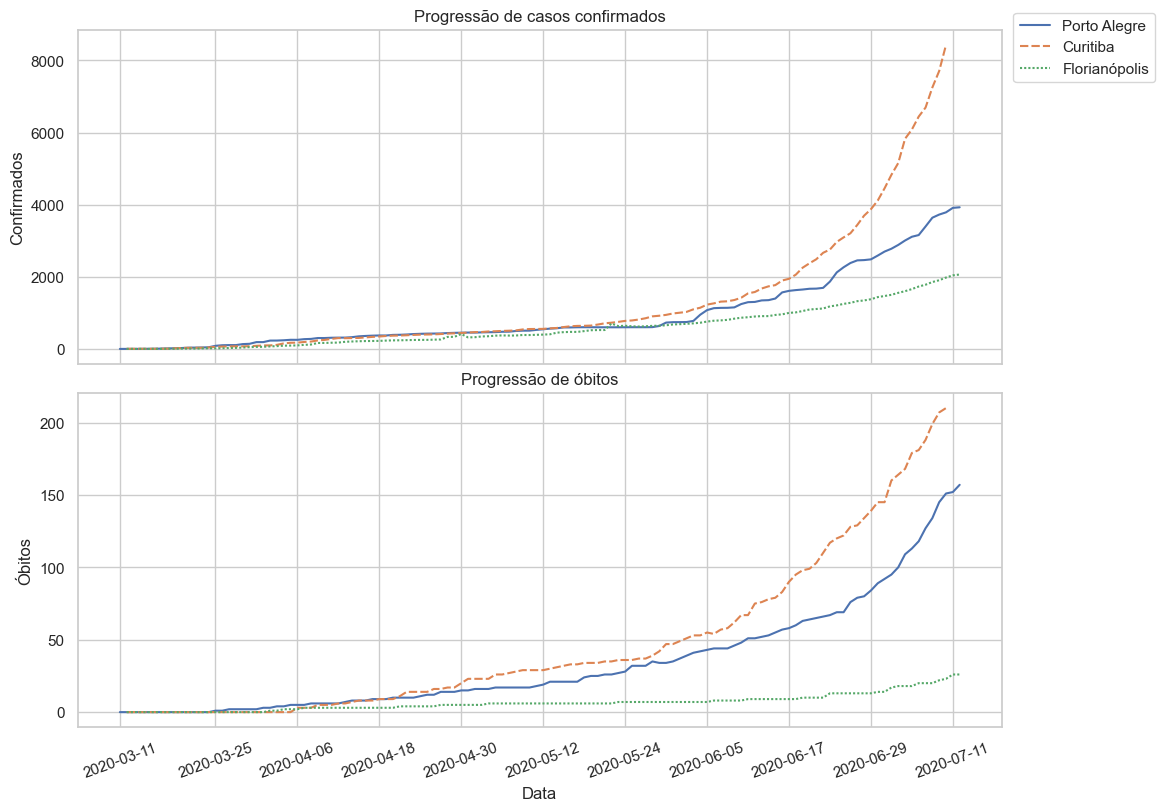

In [26]:
fig,ax = plt.subplots(2, 1, figsize = (10,8), layout = 'constrained', sharex = True)

lines = _plot_line(dataFrame = sul_data,
  axs = 0,
  xAxisName = 'date',
  yAxisName = 'last_available_confirmed',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Confirmados',
  grapthTitle = 'Progressão de casos confirmados',
  legendTitle = 'Cidade')

lines = _plot_line(dataFrame = sul_data,
  axs = 1,
  xAxisName ='date',
  yAxisName ='last_available_deaths',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Óbitos',
  grapthTitle = 'Progressão de óbitos',
  legendTitle = 'Cidade')

handles, labels = lines.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

Southeast data

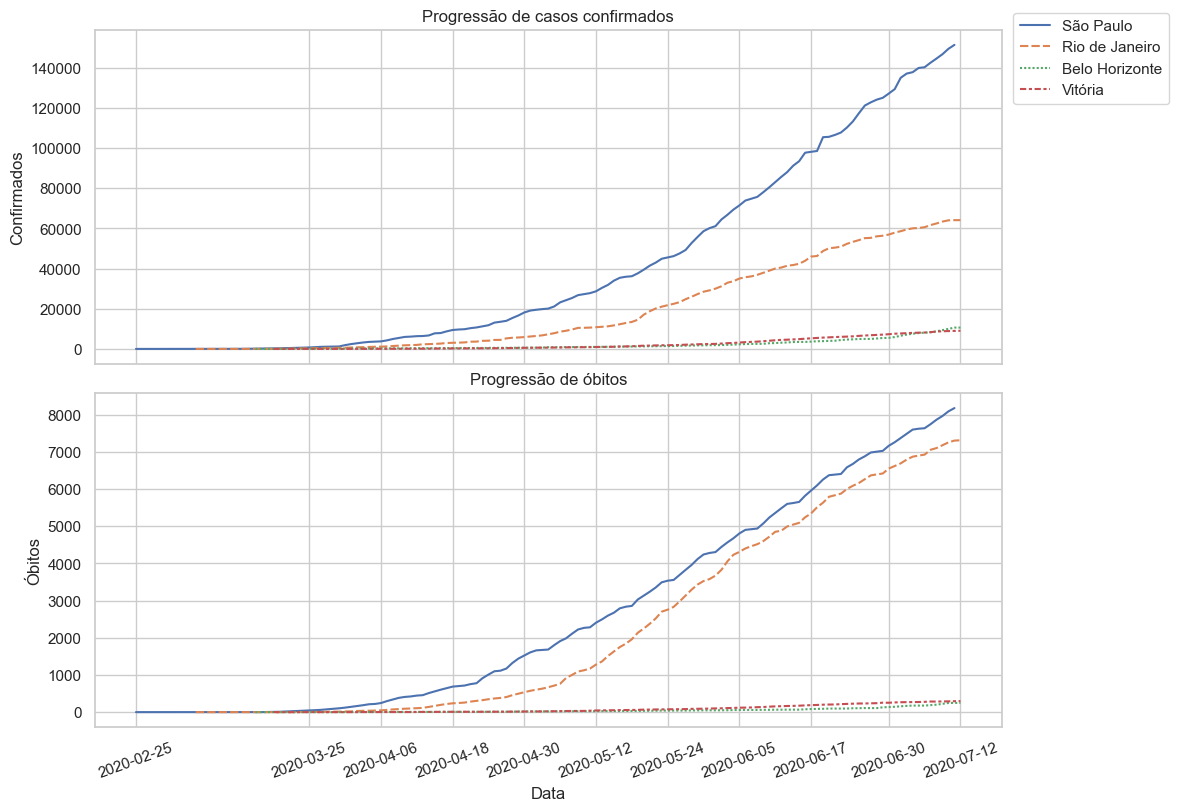

In [27]:
fig,ax = plt.subplots(2, 1, figsize = (10,8), layout = 'constrained', sharex = True)

lines = _plot_line(dataFrame = sudeste_data,
  axs = 0,
  xAxisName = 'date',
  yAxisName = 'last_available_confirmed',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Confirmados',
  grapthTitle = 'Progressão de casos confirmados',
  legendTitle = 'Cidade')

lines = _plot_line(dataFrame = sudeste_data,
  axs = 1,
  xAxisName = 'date',
  yAxisName = 'last_available_deaths',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Óbitos',
  grapthTitle = 'Progressão de óbitos',
  legendTitle = 'Cidade')
handles, labels = lines.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

In [5]:
Capitais =["Manaus", "Macapá", "Porto Velho", "Rio Branco", "Boa Vista", "Belém", "Palmas", "Curitiba", "Porto Alegre", "Florianópolis", "São Paulo", "Rio de Janeiro", "Belo Horizonte", "Vitória", "Goiânia", "Cuiabá", "Campo Grande", "Brasília", "Recife", "Salvador", "Fortaleza", "Natal", "Aracaju", "Maceió", "São Luís", "João Pessoa", "Teresina"]

In [66]:
Q2 = df[df['city'].isin(Capitais)][['city', 'estimated_population_2019', 'new_confirmed', 'new_deaths']]

capitals_grouped = Q2.groupby(['city','estimated_population_2019']).sum().reset_index()
capitals_grouped = capitals_grouped.groupby('city').sum().reset_index()
capitals_grouped = capitals_grouped.rename(columns={'new_confirmed':'total_confirmed','new_deaths':'total_deaths'})

capitals_grouped['percentual_confirmed'] = np.round(capitals_grouped['total_confirmed']/capitals_grouped['estimated_population_2019']*100,2)
capitals_grouped['percentual_deaths'] = np.round(capitals_grouped['total_deaths']/capitals_grouped['estimated_population_2019']*100,2)
capitals_grouped = capitals_grouped.sort_values(by='percentual_deaths', ascending = False)

capitals_grouped

,city,estimated_population_2019,total_confirmed,total_deaths,percentual_confirmed,percentual_deaths
2,Belém,1514765.0,22452,1996,1.48,0.13
9,Fortaleza,2669342.0,38127,3498,1.43,0.13
19,Recife,1645727.0,22749,1966,1.38,0.12
21,Rio de Janeiro,6718903.0,64110,7310,0.95,0.11
14,Manaus,2182763.0,30217,1905,1.38,0.09
23,São Luís,1101884.0,14336,964,1.30,0.09
26,Vitória,362097.0,9029,297,2.49,0.08
3,Boa Vista,406264.0,16629,319,4.09,0.08
18,Porto Velho,529544.0,15656,425,2.96,0.08
24,São Paulo,12252023.0,151365,8176,1.24,0.07


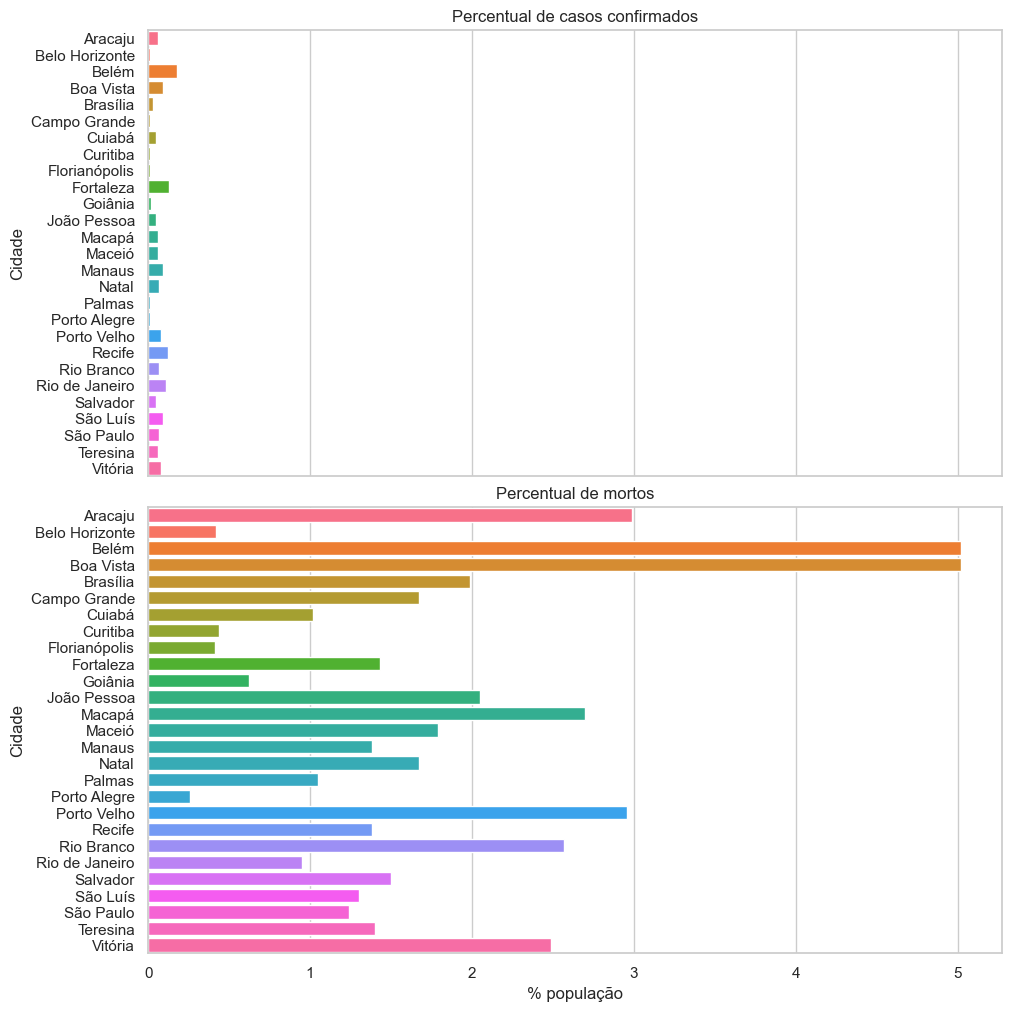

In [56]:
fig,ax = plt.subplots(2, 1, figsize = (10,10), layout = 'constrained', sharex = True)

bar = _plot_bar(dataFrame = capitals_grouped,
  axs = 0,
  xAxisName = 'percentual_deaths',
  yAxisName = 'city',
  hue = 'city',
  xlabel = '% população',
  ylabel = 'Cidade',
  grapthTitle = 'Percentual de casos confirmados',
  legendTitle = 'Cidade',
  orient = 'y')

bar = _plot_bar(dataFrame = capitals_grouped,
  axs = 1,
  xAxisName = 'percentual_confirmed',
  yAxisName = 'city',
  hue = 'city',
  xlabel = '% população',
  ylabel = 'Cidade',
  grapthTitle = 'Percentual de mortos',
  legendTitle = 'Cidade',
  orient = 'y')

plt.show()


In [69]:
capitals_grouped

,city,estimated_population_2019,total_confirmed,total_deaths,percentual_confirmed,percentual_deaths
2,Belém,1514765.0,22452,1996,1.48,0.13
9,Fortaleza,2669342.0,38127,3498,1.43,0.13
19,Recife,1645727.0,22749,1966,1.38,0.12
21,Rio de Janeiro,6718903.0,64110,7310,0.95,0.11
14,Manaus,2182763.0,30217,1905,1.38,0.09
23,São Luís,1101884.0,14336,964,1.30,0.09
26,Vitória,362097.0,9029,297,2.49,0.08
3,Boa Vista,406264.0,16629,319,4.09,0.08
18,Porto Velho,529544.0,15656,425,2.96,0.08
24,São Paulo,12252023.0,151365,8176,1.24,0.07


In [70]:
#Tomando como base, o número absoluto de mortes, as 5 cidades com maiores números são listadas da seguinte forma:
worstFive = capitals_grouped.nlargest(n=5,columns=['total_deaths'])
worstFive

,city,estimated_population_2019,total_confirmed,total_deaths,percentual_confirmed,percentual_deaths
24,São Paulo,12252023.0,151365,8176,1.24,0.07
21,Rio de Janeiro,6718903.0,64110,7310,0.95,0.11
9,Fortaleza,2669342.0,38127,3498,1.43,0.13
2,Belém,1514765.0,22452,1996,1.48,0.13
19,Recife,1645727.0,22749,1966,1.38,0.12


In [72]:
#Tomando como base, o número absoluto de mortes, as 5 cidades com menores números são listadas da seguinte forma:
bestFive = capitals_grouped.nsmallest(n=5,columns=['total_deaths'])
bestFive

,city,estimated_population_2019,total_confirmed,total_deaths,percentual_confirmed,percentual_deaths
16,Palmas,350113.0,2909,26,0.83,0.01
8,Florianópolis,500973.0,2064,26,0.41,0.01
5,Campo Grande,905540.0,4582,36,0.51,0.00
17,Porto Alegre,1483771.0,3928,157,0.26,0.01
7,Curitiba,1933105.0,8431,210,0.44,0.01


In [28]:
cidades_rj = df[(df['state'] == 'RJ') & (df['city'] != 'Rio de Janeiro') & df['city'].notna()]
cidades_rj_distintas = cidades_rj.drop_duplicates(subset=['city'])
top_5_cidades_rj = cidades_rj_distintas.nlargest(5, 'estimated_population_2019')

top_5_cidades_rj

,city,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1208,São Gonçalo,2020-03-23,13,1084839.0,False,False,3,0.27654,2020-03-23,0.0,0,1,city,RJ,3,0
1420,Duque de Caxias,2020-03-24,13,919596.0,False,False,1,0.10874,2020-03-24,0.0,0,1,city,RJ,1,0
2559,Nova Iguaçu,2020-03-28,13,821128.0,False,False,1,0.12178,2020-03-28,0.0,0,1,city,RJ,1,0
118,Niterói,2020-03-12,11,513584.0,False,False,1,0.19471,2020-03-12,0.0,0,1,city,RJ,1,0
1923,Belford Roxo,2020-03-26,13,510906.0,False,False,1,0.19573,2020-03-26,0.0,0,1,city,RJ,1,0


In [8]:
top_cities_death_rate = df.groupby('city')['last_available_deaths'].min().nlargest(3)
selected_data = df[df['city'].isin(top_cities_death_rate.index)]
aggregated_data = selected_data.groupby('city')['estimated_population_2019'].min()
result = pd.concat([top_cities_death_rate, aggregated_data], axis=1)
result

,last_available_deaths,estimated_population_2019
city,,
Bragança Paulista,2,168668.0
Lucélia,2,21747.0
Acarape,1,14929.0
Agrestina,1,24885.0
Agronômica,1,5448.0


In [32]:
cidadesGrupoC = ['Florianópolis', 'Ponta Grossa']

#Extraindo as 5 maiores cidades do Estado do Rio de Janeiro, excluindo a capital
cidades_rj = df[(df['state'] == 'RJ') & (df['city'] != 'Rio de Janeiro') & df['city'].notna()]
cidades_rj_distintas = cidades_rj.drop_duplicates(subset=['city'])
top_5_cidades_rj = cidades_rj_distintas.nlargest(5, 'estimated_population_2019')['city'].tolist()

#Extraindo as 5 maiores cidades (em população) da região Centro-Oeste excluindo as capitais
capitais_centro_oeste = ["Brasília", "Goiânia", "Cuiabá", "Campo Grande"]
cidades_centro_oeste = df[(df['state'].isin(['DF', 'GO', 'MT', 'MS'])) & (~df['city'].isin(capitais_centro_oeste)) & df['city'].notna()]
cidades_centro_oeste_distintas = cidades_centro_oeste.drop_duplicates(subset=['city'])
top_5_cidades_centro_oeste = cidades_centro_oeste_distintas.nlargest(5, 'estimated_population_2019')['city'].tolist()

#Criando um novo grupo com todas as cidades
cidadesGrupoC += top_5_cidades_rj + top_5_cidades_centro_oeste
print(len(cidadesGrupoC))
    

12


In [73]:
grupoCData = df[df['city'].isin(cidadesGrupoC)][['city', 'estimated_population_2019', 'new_confirmed', 'new_deaths']]

grupoCData = grupoCData.groupby(['city','estimated_population_2019']).sum().reset_index()
grupoCData = grupoCData.groupby('city').sum().reset_index()
grupoCData = grupoCData.rename(columns={'new_confirmed':'total_confirmed','new_deaths':'total_deaths'})

grupoCData['percentual_confirmed'] = np.round(grupoCData['total_confirmed']/grupoCData['estimated_population_2019']*100,2)
grupoCData['percentual_deaths'] = np.round(grupoCData['total_deaths']/grupoCData['estimated_population_2019']*100,2)
grupoCData = grupoCData.sort_values(by='percentual_deaths', ascending = False)


grupoCData

,city,estimated_population_2019,total_confirmed,total_deaths,percentual_confirmed,percentual_deaths
11,Várzea Grande,289362.0,2163,193,0.75,0.07
3,Duque de Caxias,919596.0,3545,481,0.39,0.05
5,Niterói,513584.0,7139,242,1.39,0.05
10,São Gonçalo,1084839.0,6183,522,0.57,0.05
2,Belford Roxo,510906.0,1581,188,0.31,0.04
6,Nova Iguaçu,821128.0,3604,369,0.44,0.04
8,Rio Verde,235647.0,5234,91,2.22,0.04
9,Rondonópolis,232491.0,2218,100,0.95,0.04
0,Anápolis,386923.0,1376,22,0.36,0.01
1,Aparecida de Goiânia,578179.0,4158,78,0.72,0.01


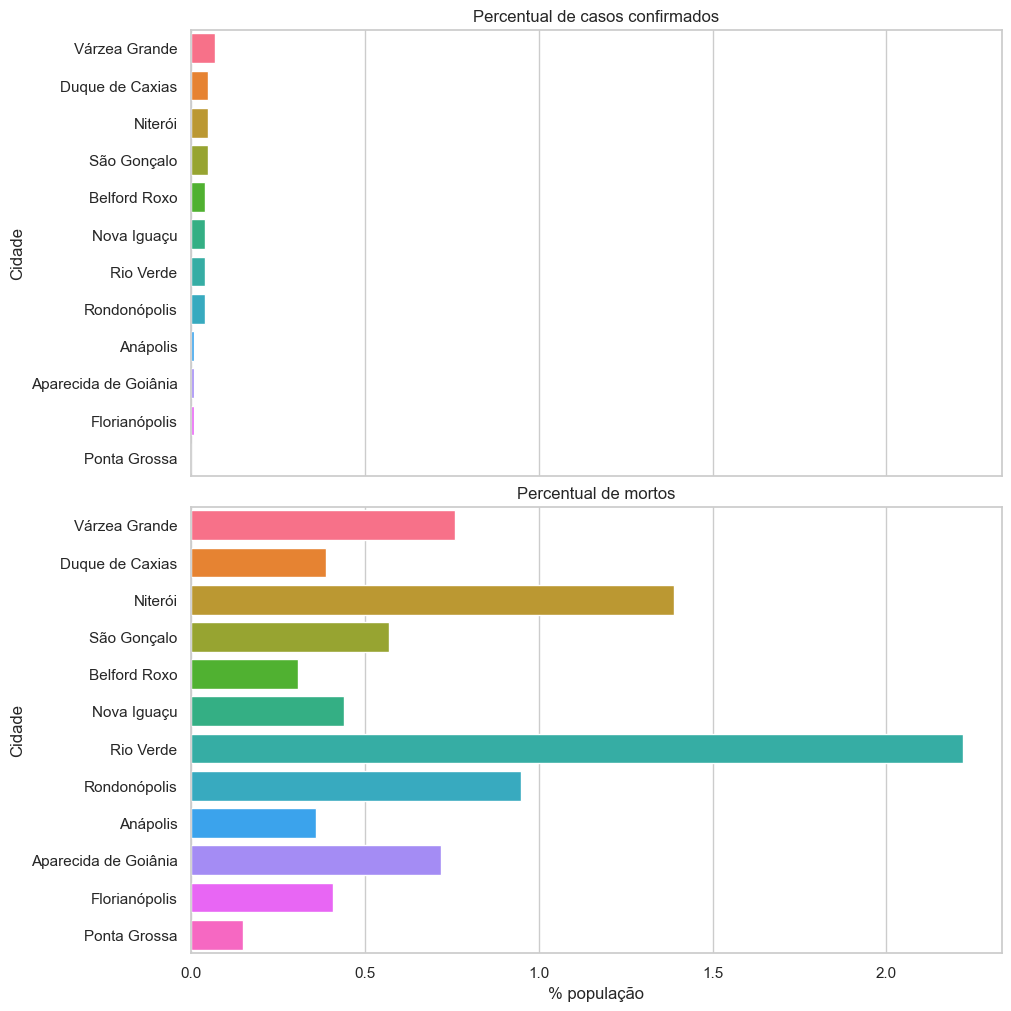

In [35]:
fig,ax = plt.subplots(2, 1, figsize = (10,10), layout = 'constrained', sharex = True)

bar = _plot_bar(dataFrame = grupoCData,
  axs = 0,
  xAxisName = 'percentual_deaths',
  yAxisName = 'city',
  hue = 'city',
  xlabel = '% população',
  ylabel = 'Cidade',
  grapthTitle = 'Percentual de casos confirmados',
  legendTitle = 'Cidade',
  orient = 'y')

bar = _plot_bar(dataFrame = grupoCData,
  axs = 1,
  xAxisName = 'percentual_confirmed',
  yAxisName = 'city',
  hue = 'city',
  xlabel = '% população',
  ylabel = 'Cidade',
  grapthTitle = 'Percentual de mortos',
  legendTitle = 'Cidade',
  orient = 'y')

plt.show()


In [74]:
worstThree = grupoCData.nlargest(n=3,columns=['total_deaths'])
worstThree

,city,estimated_population_2019,total_confirmed,total_deaths,percentual_confirmed,percentual_deaths
10,São Gonçalo,1084839.0,6183,522,0.57,0.05
3,Duque de Caxias,919596.0,3545,481,0.39,0.05
6,Nova Iguaçu,821128.0,3604,369,0.44,0.04


In [75]:
bestThree = grupoCData.nsmallest(n=3,columns=['total_deaths'])
bestThree

,city,estimated_population_2019,total_confirmed,total_deaths,percentual_confirmed,percentual_deaths
7,Ponta Grossa,351736.0,545,3,0.15,0.00
0,Anápolis,386923.0,1376,22,0.36,0.01
4,Florianópolis,500973.0,2064,26,0.41,0.01


In [39]:
grupoCData = Q1[Q1['city'].isin(cidadesGrupoC)][['date','last_available_confirmed','last_available_deaths','city']]

In [57]:
grupoCData['city'].unique()

array(['Rio Verde', 'Niterói', 'Florianópolis', 'Anápolis',
       'Aparecida de Goiânia', 'Ponta Grossa', 'Várzea Grande',
       'São Gonçalo', 'Duque de Caxias', 'Belford Roxo', 'Nova Iguaçu',
       'Rondonópolis'], dtype=object)

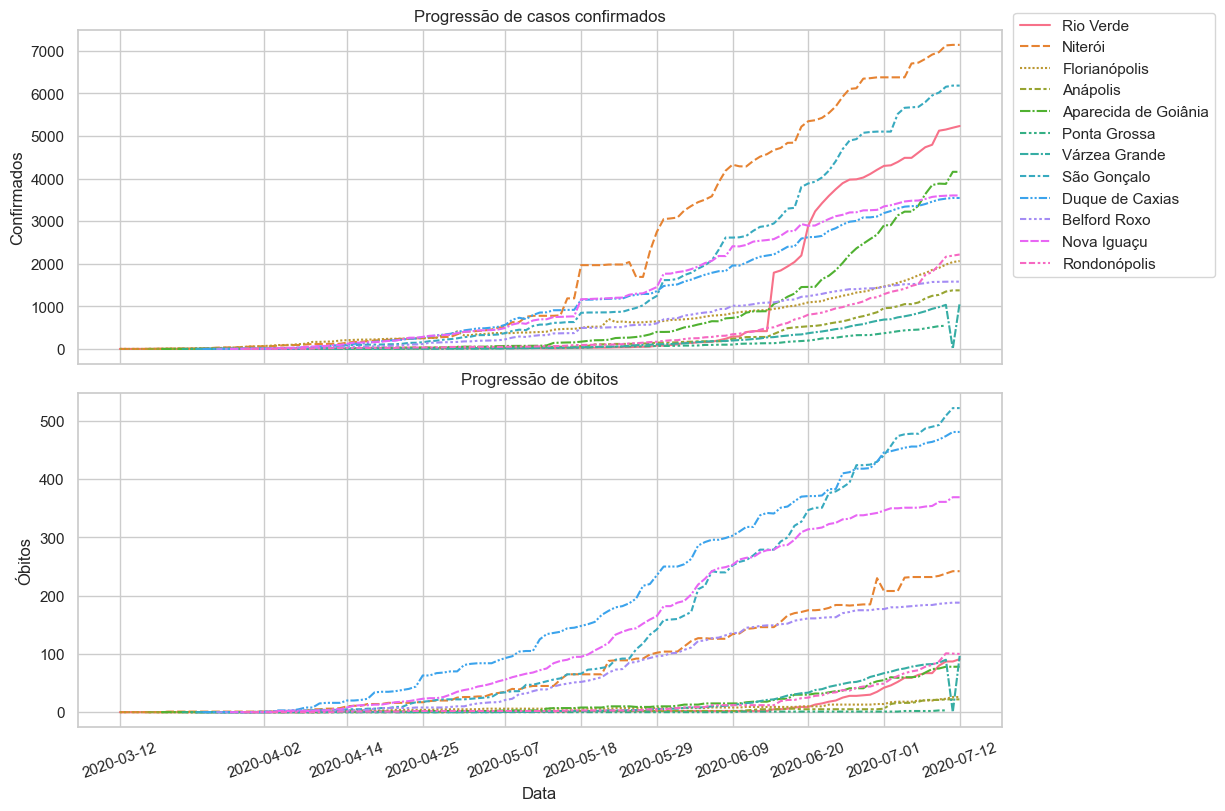

In [77]:
fig,ax = plt.subplots(2, 1, figsize = (10,8), layout = 'constrained', sharex = True)

lines = _plot_line(dataFrame = grupoCData,
 axs = 0,
 xAxisName = 'date',
 yAxisName = 'last_available_confirmed',
 hue = 'city',
 style = 'city',
 xlabel = 'Data',
 ylabel = 'Confirmados',
 grapthTitle = 'Progressão de casos confirmados',
 legendTitle = 'Cidade')


lines = _plot_line(dataFrame = grupoCData,
 axs = 1,
 xAxisName = 'date',
 yAxisName = 'last_available_deaths',
 hue = 'city',
 style = 'city',
 xlabel = 'Data',
 ylabel = 'Óbitos',
 grapthTitle = 'Progressão de óbitos',
 legendTitle = 'Cidade')
handles, labels = lines.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor = (1,1))


plt.show()